In [3]:
import os
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

List the files in the country of origin data.

In [5]:
root = pathlib.Path("data")
os.listdir(root / "census2021-ts004")

['census2021-ts004-llta.csv',
 'census2021-ts004-rgn.csv',
 'census2021-ts004-msoa.csv',
 'census2021-ts004-ctry.csv',
 'census2021-ts004-ulta.csv',
 'census2021-ts004-lsoa.csv',
 'census2021-ts004-oa.csv',
 'metadata']

Load the regional data.

In [6]:
df = pd.read_csv(root / "census2021-ts004" / "census2021-ts004-rgn.csv")
df.head()

,date,geography,geography code,Country of birth: Total; measures: Value,Country of birth: Europe; measures: Value,Country of birth: Europe: United Kingdom; measures: Value,Country of birth: Europe: EU countries; measures: Value,Country of birth: Europe: EU countries: European Union EU14; measures: Value,Country of birth: Europe: EU countries: European Union EU8; measures: Value,Country of birth: Europe: EU countries: European Union EU2; measures: Value,Country of birth: Europe: EU countries: All other EU countries; measures: Value,Country of birth: Europe: Non-EU countries; measures: Value,Country of birth: Europe: Non-EU countries: All other non-EU countries; measures: Value,Country of birth: Africa; measures: Value,Country of birth: Middle East and Asia; measures: Value,Country of birth: The Americas and the Caribbean; measures: Value,Country of birth: Antarctica and Oceania (including Australasia) and Other; measures: Value,Country of birth: British Overseas ; measures: Value
0,2021,North East,E12000001,2647013,2536430,2467870,61727,30080,20355,8981,2311,6833,6833,26473,71693,9171,2973,273
1,2021,North West,E12000002,7417399,6885187,6551993,305712,139892,115979,43717,6124,27482,27482,128962,347989,43345,10035,1881
2,2021,Yorkshire and The Humber,E12000003,5480774,5117879,4858514,240412,78153,119411,37722,5126,18953,18953,83583,241324,28969,7725,1294
3,2021,East Midlands,E12000004,4880054,4520575,4210674,281145,87123,134195,53134,6693,28756,28756,109189,209919,31681,7006,1684
4,2021,West Midlands,E12000005,5950759,5373979,5048322,300823,117983,111088,66232,5520,24834,24834,132413,382278,51874,7446,2769


Find the number of people in the Midlands that were born in Europe.

In [7]:
df.loc[
    df["geography"].isin(["North East", "North West"]),
    "Country of birth: Europe; measures: Value"
].sum()

9421617

Find the number of people in the Midlands that were born in the Midlands.

In [8]:
df.loc[
    df["geography"].isin(["East Midlands", "West Midlands"]),
    "Country of birth: Europe; measures: Value"
].sum()

9894554

Get the Nort West demographic data into a Pandas Dataframe.

In [9]:
north_west_data = (
    df.loc[
        df["geography"] == "North West",
        df.columns.drop(
            ["date", "geography", "geography code", "Country of birth: Total; measures: Value"]
        )
    ]
    .squeeze()
    .to_frame("Population")
    .reset_index(names="Origin")
)

north_west_data

,Origin,Population
0,Country of birth: Europe; measures: Value,6885187
1,Country of birth: Europe: United Kingdom; meas...,6551993
2,Country of birth: Europe: EU countries; measur...,305712
3,Country of birth: Europe: EU countries: Europe...,139892
4,Country of birth: Europe: EU countries: Europe...,115979
5,Country of birth: Europe: EU countries: Europe...,43717
6,Country of birth: Europe: EU countries: All ot...,6124
7,Country of birth: Europe: Non-EU countries; me...,27482
8,Country of birth: Europe: Non-EU countries: Al...,27482
9,Country of birth: Africa; measures: Value,128962


The strings in the origin column are long and hard to understand. They can be simplified by removing the `Country of birth` start and the part after the semicolon.

In [10]:
north_west_data["Origin"] = (
    north_west_data["Origin"].str.split(";")
    .apply(lambda x: x[0])
    .str.replace("Country of birth: ", " ")
)

north_west_data

,Origin,Population
0,Europe,6885187
1,Europe: United Kingdom,6551993
2,Europe: EU countries,305712
3,Europe: EU countries: European Union EU14,139892
4,Europe: EU countries: European Union EU8,115979
5,Europe: EU countries: European Union EU2,43717
6,Europe: EU countries: All other EU countries,6124
7,Europe: Non-EU countries,27482
8,Europe: Non-EU countries: All other non-EU co...,27482
9,Africa,128962


Already we see very few people reported begin from a British overseas territory.

Plot a barplot of the populations.

/var/folders/4m/k8v4qbvs2qx5bygbcnt4nn240000gq/T/ipykernel_60124/3273955654.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(north_west_data["Origin"], rotation=60, ha="right");


Text(0.5, 0, 'Origin')

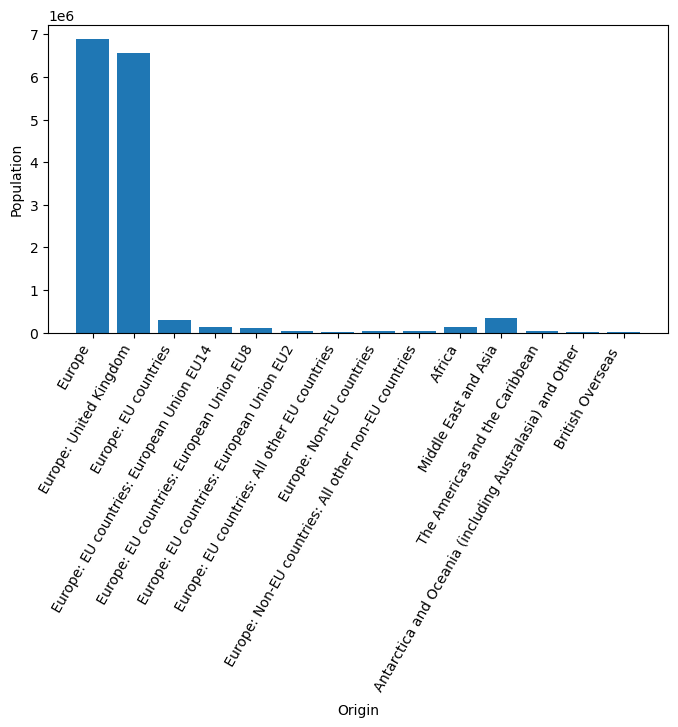

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.bar(x=north_west_data["Origin"], height=north_west_data["Population"])
ax.set_xticklabels(north_west_data["Origin"], rotation=60, ha="right");
ax.set_ylabel("Population")
ax.set_xlabel("Origin")

## Health and Education

Load the health and education datasets.

In [12]:
df_edu = pd.read_csv(root / "census2021-ts067" / "census2021-ts067-ltla.csv")
df_hea = pd.read_csv(root / "census2021-ts037" / "census2021-ts037-ltla.csv")
df_hea.head()

,date,geography,geography code,General health: Total: All usual residents,General health: Very good health,General health: Good health,General health: Fair health,General health: Bad health,General health: Very bad health
0,2021,Hartlepool,E06000001,92338,39817,30749,14415,5625,1732
1,2021,Middlesbrough,E06000002,143924,67207,46382,19821,7969,2545
2,2021,Redcar and Cleveland,E06000003,136531,58085,46416,21633,7916,2481
3,2021,Stockton-on-Tees,E06000004,196595,91479,65521,27307,9392,2896
4,2021,Darlington,E06000005,107800,48749,37324,15383,5016,1328


The total number of residents is in the `General health: Total: All usual residents` column. The other columns should sum up to this column.

Plot a scatter plot between between the number of people who reported having bad health and the number of people that reported being in very bad health.

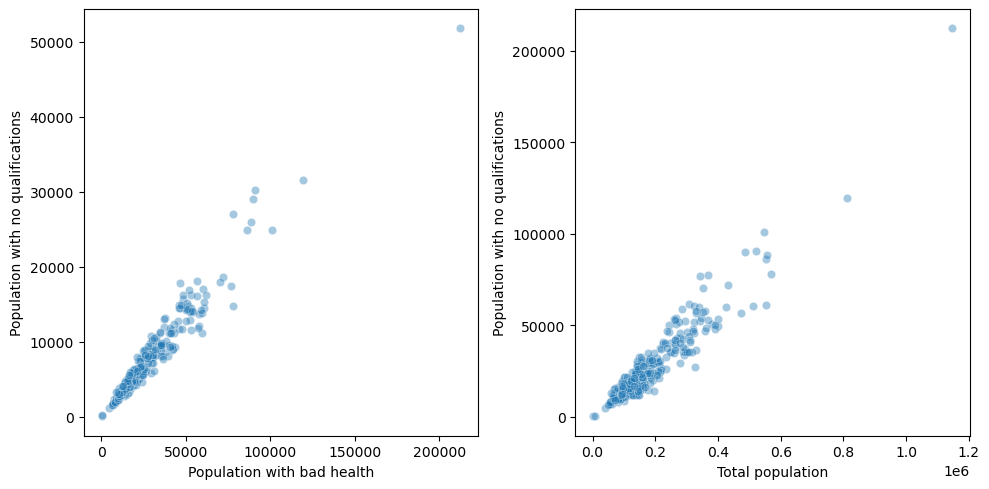

In [13]:
df_merged = df_hea.merge(
    df_edu[df_edu.columns.drop(["date", "geography"])],
    on="geography code"
)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(
    df_merged,
    x="Highest level of qualification: No qualifications",
    y="General health: Bad health",
    ax=ax[0],
    alpha=0.4
)
sns.scatterplot(
    df_merged,
    x="General health: Total: All usual residents",
    y="Highest level of qualification: No qualifications",
    ax=ax[1],
    alpha=0.4
)
ax[0].set_xlabel("Population with bad health")
ax[0].set_ylabel("Population with no qualifications")
ax[1].set_xlabel("Total population")
ax[1].set_ylabel("Population with no qualifications")
fig.tight_layout()

From the left plot, there appears to be a positive corrleation between the number of people that reported having the bad health and the number that reported having no qualifications. However, there is also a positive correlation between the total population and the number of people that reported having no qualifiactions.

The larger the population, the more people reported having no qualifications. So the correlation between health and education is potentially spurious.

* One scatter point has a much larger total population than the rest, which area is this? Does this are have more middle layer super output areas (MSOA) than other areas? Could this cause bias issues for your analysis?

To get a clearer picture of the correlation, we need to normalize the data using the total population in each region. 

<Axes: xlabel='Highest level of qualification: No qualifications', ylabel='General health: Bad health'>

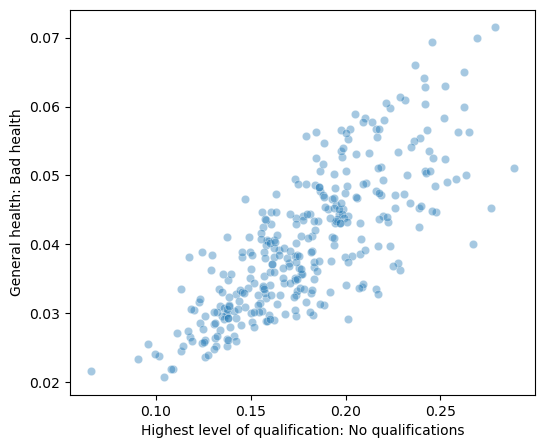

In [14]:
education_columns = [
    "Highest level of qualification: No qualifications",
    "Highest level of qualification: Level 1 and entry level qualifications",
    "Highest level of qualification: Level 2 qualifications",
    "Highest level of qualification: Apprenticeship",
    "Highest level of qualification: Level 3 qualifications",
    "Highest level of qualification: Level 4 qualifications and above",
    "Highest level of qualification: Other qualifications",
]

health_columns = [
    "General health: Very good health",
    "General health: Good health",
    "General health: Fair health",
    "General health: Bad health",
    "General health: Very bad health",
]

df_merged_normalised = df_merged.copy()
df_merged_normalised[health_columns]= df_merged_normalised[health_columns].divide(
    df_merged_normalised["General health: Total: All usual residents"], axis=0
)
df_merged_normalised[education_columns] = df_merged_normalised[education_columns].divide(
    df_merged_normalised["Highest level of qualification: Total: All usual residents aged 16 years and over"], axis=0
)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.scatterplot(
    df_merged_normalised,
    x="Highest level of qualification: No qualifications",
    y="General health: Bad health",
    alpha=0.4
)

There is still a positive correlation between the number of people that reported having no qualifications and number of people that reported having bad health but the correlation is much weaker.

* Can you quantify this correlation with Pearson's corellation coefficient or Spearman's rank correlation coefficient?
* Is there a different relationship for different health conditions or education levels?
* Does this positive correlation persist across all Middle Layer Super Output Areas (MSOA)?

## Chloropleth Maps

Chloropleths maps is a map which is shaded different colours depending on some numerical quantity or statistical quantity.

For this, we are going to use GeoPandas.

To plot the maps, we need shape data for the boundaries between different areas. The shape data for the UK can be downloaded here https://borders.ukdataservice.ac.uk/easy_download.html.

For now, plot the regional data.

In [42]:
import geopandas as gpd

df_shape = gpd.read_file(root / "shape_data" / "England_rgn_2022" / "England_rgn_2022.shp")
df_shape.head()

,label,name,rgn22cd,rgn22nm,rgn22nmw,geometry
0,E92000001E12000002,North West,E12000002,North West,NaN,"POLYGON ((327662.000 468260.500, 327640.000 46..."
1,E92000001E12000007,London,E12000007,London,NaN,"POLYGON ((509398.873 171286.492, 509394.020 17..."
2,E92000001E12000004,East Midlands,E12000004,East Midlands,NaN,"POLYGON ((420929.792 329708.904, 420926.011 32..."
3,E92000001E12000003,Yorkshire and The Humber,E12000003,Yorkshire and The Humber,NaN,"POLYGON ((404820.688 406551.595, 404771.903 40..."
4,E92000001E12000005,West Midlands,E12000005,West Midlands,NaN,"POLYGON ((346944.594 220143.078, 346976.406 22..."


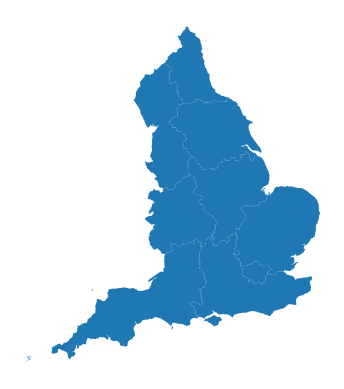

In [43]:
df_shape.plot()
plt.axis("off");

Plot the regional country of origin data onto the map.

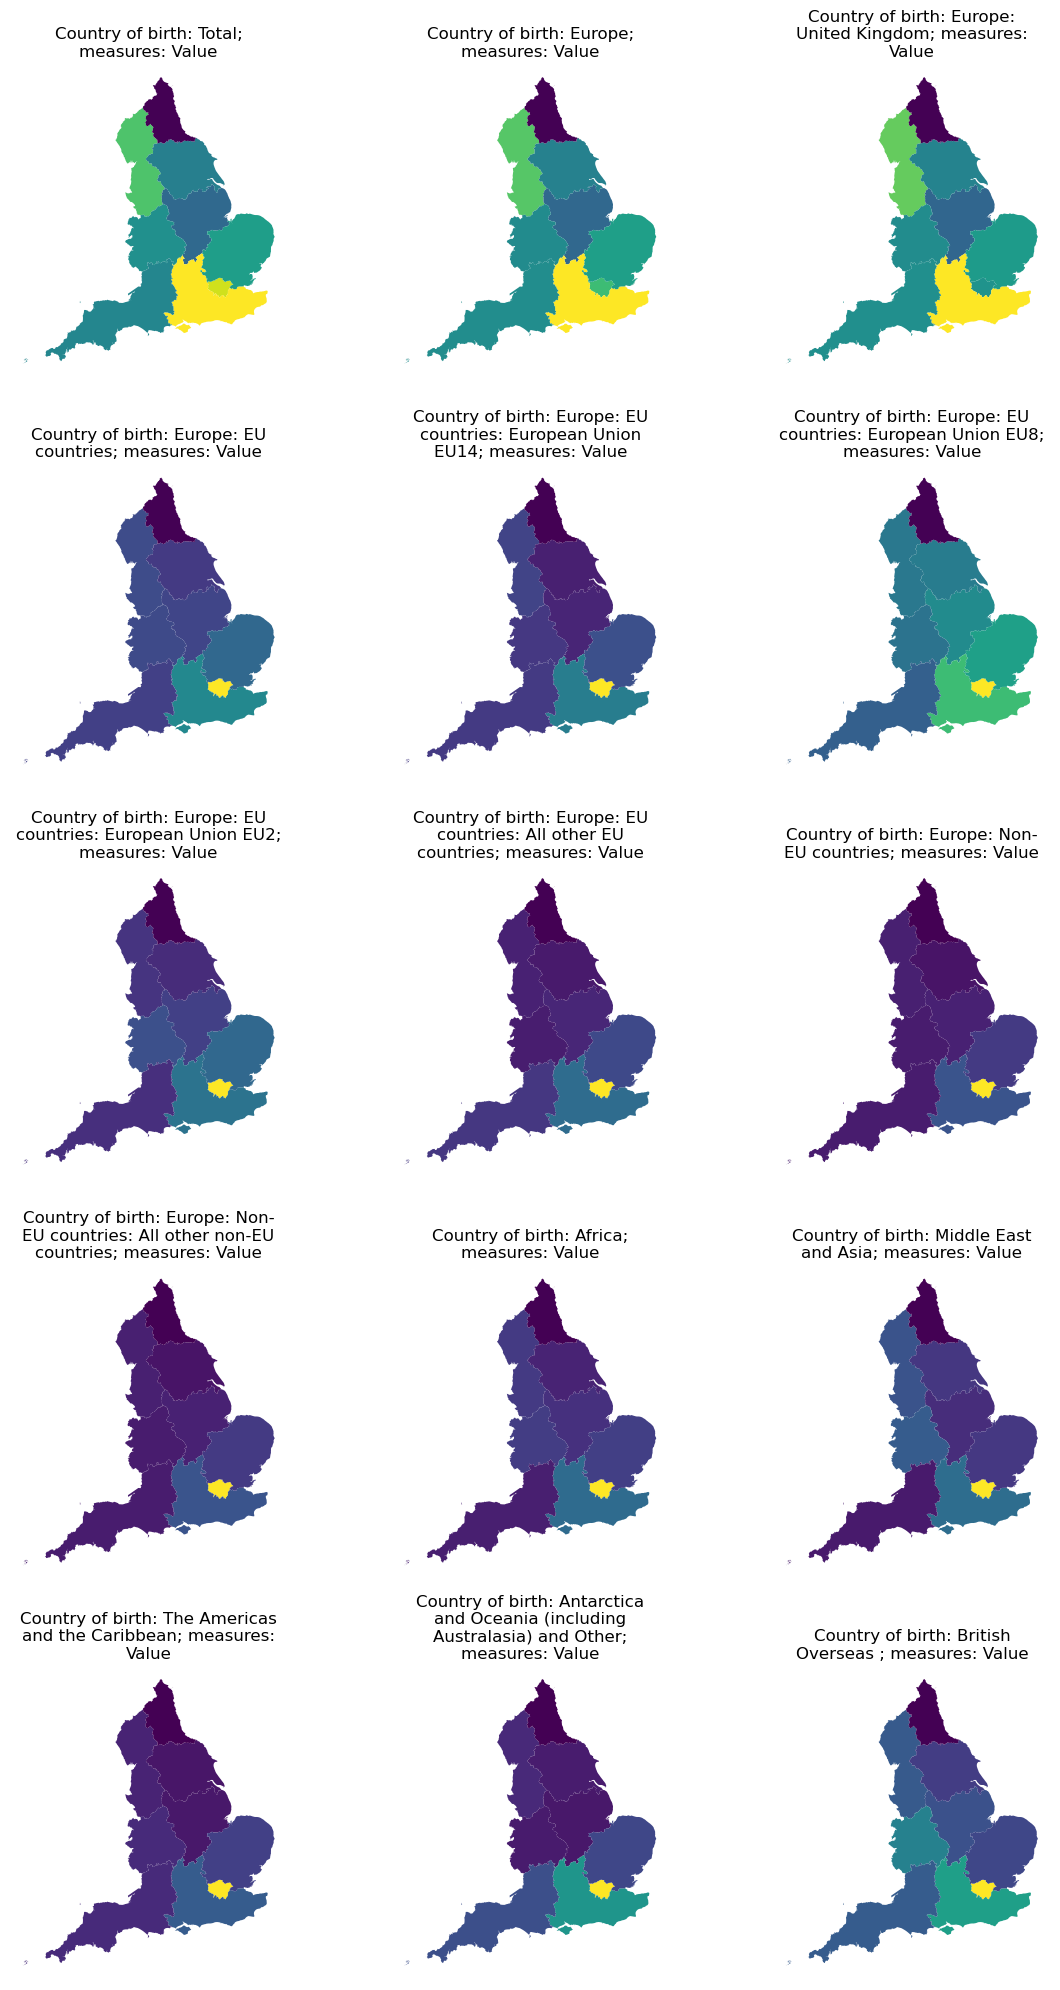

In [81]:
import math
import textwrap

# Load the regional country of origin data
df_orig = pd.read_csv(root / "census2021-ts004" / "census2021-ts004-rgn.csv")
df_merged = df_shape.merge(df_orig, left_on="rgn22cd", right_on="geography code")

columns_for_plotting = df_orig.columns.drop(["date", "geography", "geography code"])
number_of_columns = 3
number_of_rows = math.ceil(len(columns_for_plotting) / number_of_columns)

fig, ax = plt.subplots(
    number_of_rows,
    number_of_columns,
    figsize=(number_of_columns * 4, number_of_rows * 4)
)
for i, column in enumerate(columns_for_plotting):
    row, col = divmod(i, number_of_columns)
    df_merged.plot(column=column, ax=ax[row, col])
    title = "\n".join(textwrap.wrap(column, width=30))
    ax[row, col].axis("off")
    ax[row, col].set_title(title, wrap=True)
fig.tight_layout()

London looks the most ethnically diverse region.

* How do the distributions change when looking at each population relative to the total population for that region?
* Can the country of birth be paired with another protected characteristic that may describe a small percentage of the population?
* Do these trend h
* Can you make this plot interactive so when you hover over a region it tells you the population in the that region and the name of the region? Try using Plotly for this https://plotly.com/python/choropleth-maps/.